# Шаг 1: Загрузка и объединение данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL к датасету (Cleveland)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# названия столбцов из документации датасета
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

# загрузка данных
df = pd.read_csv(url, names=columns)

# заменим "?" на NaN для удобства
df.replace('?', pd.NA, inplace=True)

# посмотрим первые 5 строк датасета
print(df.head())

# базовая информация о данных
print(df.info())

# проверка на пропуски
print(df.isnull().sum())



    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-n

обработка пропусков

In [2]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


т.к. таргет принимает значения от 0 до 4, а нам нужно сделать задачу бинарной классификацией (болеет или не болеет) мы обрабатываем таргет и решаем что все что больше 0 это болезнь

In [3]:
# всё что больше 0, это наличие болезни
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


# Шаг 2: Исследовательский анализ данных (EDA)  
  

In [4]:
# Базовая статистика по числовым признакам
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.461279  
std      0.994914   22.941562 

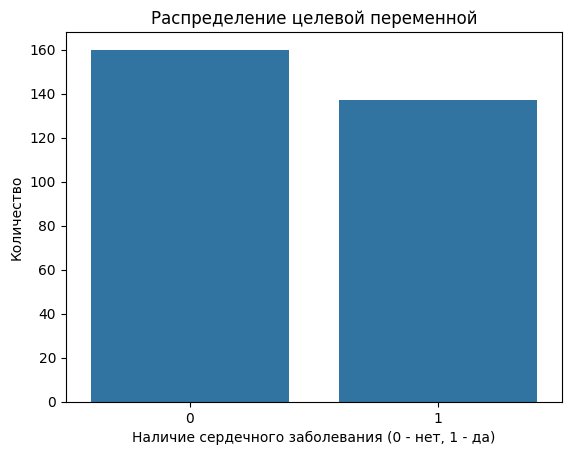

In [5]:

# Соотношение классов в целевой переменной
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.xlabel('Наличие сердечного заболевания (0 - нет, 1 - да)')
plt.ylabel('Количество')
plt.show()

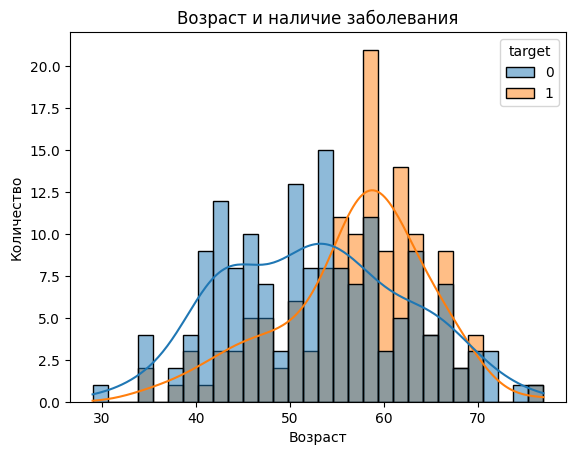

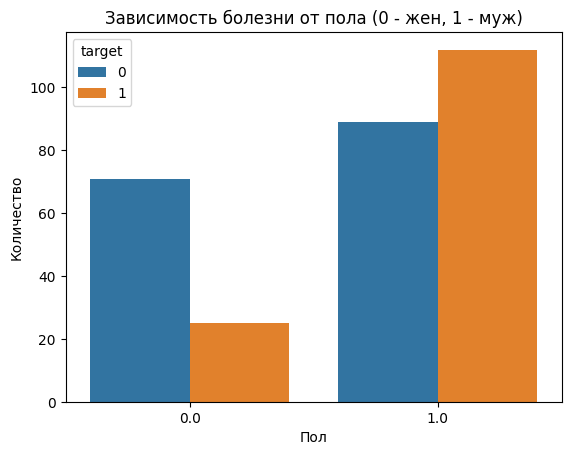

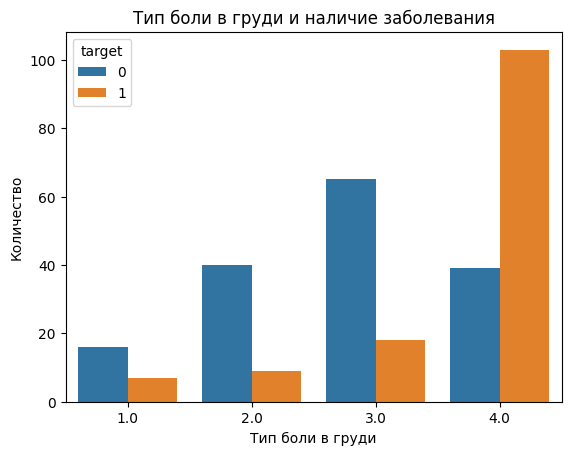

In [6]:

# Распределение возрастов по наличию заболевания
sns.histplot(data=df, x='age', hue='target', kde=True, bins=30)
plt.title('Возраст и наличие заболевания')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Пол и наличие сердечных заболеваний
sns.countplot(x='sex', hue='target', data=df)
plt.title('Зависимость болезни от пола (0 - жен, 1 - муж)')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# Боль в груди (cp) и наличие заболеваний
sns.countplot(x='cp', hue='target', data=df)
plt.title('Тип боли в груди и наличие заболевания')
plt.xlabel('Тип боли в груди')
plt.ylabel('Количество')
plt.show()

Выводы по первичному EDA:  
1. Баланс классов (target):  
- Примерно равномерное распределение (около 46% пациентов с болезнью и 54% без заболевания).
- Дисбаланс классов незначительный, что хорошо для обучения моделей.
2. Возраст и сердечные заболевания:
- Пациенты с заболеваниями в основном старше 50 лет (особенно выражено от 55 до 65 лет).
- Молодые пациенты (до 40 лет) редко страдают сердечными заболеваниями.
3. Пол и заболевания:
- У мужчин заболевание встречается чаще.
- Женщины реже подвержены заболеванию в текущем датасете.
4. Тип боли в груди (cp):
- Пациенты с типом боли в груди 4 имеют значительно большую вероятность наличия сердечного заболевания.
- Типы боли 1-3 чаще ассоциируются с отсутствием болезни.

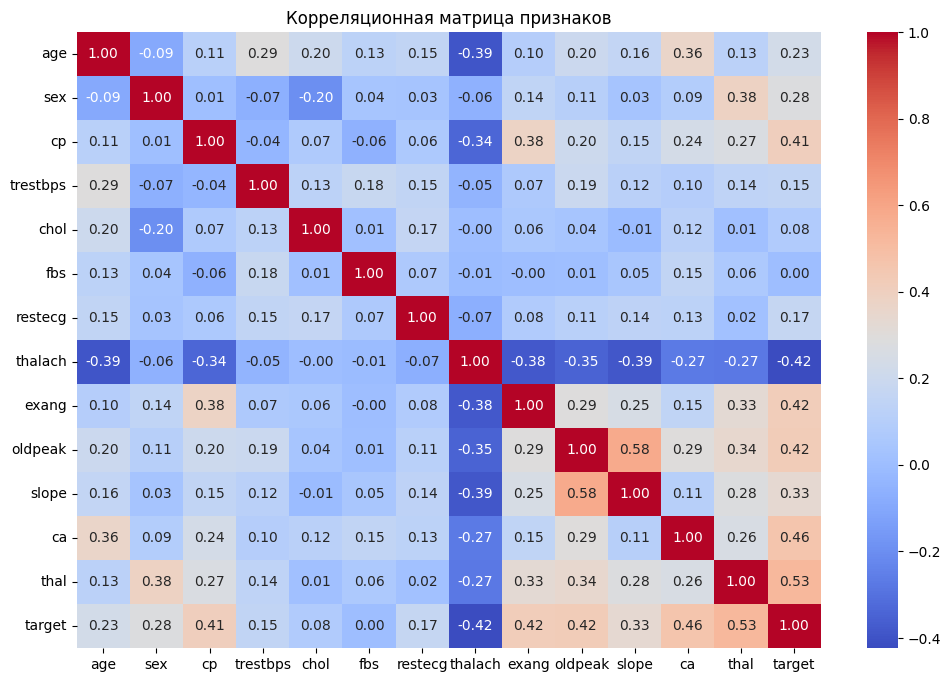

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()


Наибольшую положительную корреляцию с наличием сердечных заболеваний имеют:  
  
- thal (0.53) – тип талассемии (очень важный признак!).
- ca (0.46) – количество крупных сосудов, окрашенных при ангиографии.
- cp (0.41) – тип боли в груди.
- exang (0.42) – наличие стенокардии при физической нагрузке.
- oldpeak (0.42) – депрессия сегмента ST при нагрузке. 
   
Наибольшая отрицательная корреляция:
  
- thalach (-0.42) – максимальный пульс (чем выше пульс при нагрузке, тем меньше риск заболевания).

# Шаг 3: Подготовка данных к обучению модели

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding для категориальных признаков
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'restecg', 'slope'])

# Признаки и целевая переменная
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Разделение данных на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабируем числовые признаки (StandardScaler)
scaler = StandardScaler()

# список числовых признаков для масштабирования
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# обучаем scaler на train и применяем его
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Проверим размерности
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)


Train shape: (237, 22) (237,)
Test shape: (60, 22) (60,)


# Шаг 4: Обучение и оценка базовых моделей

In [9]:
# Импортируем модели и метрику оценки
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Создаем список моделей
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Обучаем и оцениваем модели
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'\n{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, predictions))



Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


Random Forest Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


Gradient Boosting Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82     

# Оптимизация гиперпараметров

In [10]:
from sklearn.model_selection import GridSearchCV

# параметры для оптимизации Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Настройка GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                    param_grid, cv=5, scoring='accuracy')

# Обучение с GridSearch
grid.fit(X_train, y_train)

# Лучшие параметры и результат
print("Лучшие параметры:", grid.best_params_)
print("Лучшая точность (CV):", grid.best_score_)

# Оценка лучшей модели на тестовой выборке
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nТочность на тестовых данных:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Лучшие параметры: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Лучшая точность (CV): 0.8390070921985815

Точность на тестовых данных: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60

